In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#  Data Description

- Id: Unique identifier untuk setiap pelanggan
- Gender: Jenis kelamin pelanggan
- Umur: Umur pelanggan saat ini
- Izin Mengemudi: Kepemilikan SIM (1: Yes, 0: No)
- Kode Wilayah: Unique code tempat tinggal pelanggan
- Tanggal Asuransi: Tanggal pelanggan mulai melakukan layanan asuransi
- Tahun Kendaraan: Lama waktu kepemilikan kendaraan
- Biaya: Biaya asuransi yg perlu dibayarkan pelanggan tahun ini
- Sourcing Channel: Nomor channel pelanggan mendapatkan informasi mengenai asuransi
- Hari Diasuransikan: Lama hari pelanggan telah menjalin kerjasama asuransi
- Target: Pelanggan tertarik melanjutkan asuransi = 1, sebaliknya = 0

## Training set

In [2]:
df_train=pd.read_csv('joints_train.csv')

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382154 entries, 0 to 382153
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  382154 non-null  int64  
 1   Gender              350386 non-null  object 
 2   Umur                285896 non-null  float64
 3   Izin_Mengemudi      305507 non-null  float64
 4   Kode_Wilayah        298080 non-null  float64
 5   Tanggal_Asuransi    304070 non-null  object 
 6   Tahun_Kendaraan     315714 non-null  object 
 7   Biaya               255617 non-null  float64
 8   Sourcing_Channel    298509 non-null  float64
 9   Hari_Diasuransikan  306488 non-null  float64
 10  Target              382154 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 32.1+ MB


In [4]:
df_train.head()

,id,Gender,Umur,Izin_Mengemudi,Kode_Wilayah,Tanggal_Asuransi,Tahun_Kendaraan,Biaya,Sourcing_Channel,Hari_Diasuransikan,Target
0,58609,Pria,65.0,1.0,48.0,11/4/2018,NaN,2630.0,15.0,131.0,0
1,208222,Wanita,22.0,1.0,21.0,2/2/2018,<1 Tahun,NaN,NaN,NaN,0
2,345428,Wanita,24.0,1.0,NaN,5/12/2019,<1 Tahun,NaN,NaN,181.0,0
3,236831,Pria,58.0,1.0,46.0,NaN,1-2 Tahun,NaN,124.0,NaN,0
4,280181,Pria,NaN,1.0,36.0,11/19/2019,>2 Tahun,NaN,NaN,NaN,1


In [5]:
df_train.isnull().sum()

id                         0
Gender                 31768
Umur                   96258
Izin_Mengemudi         76647
Kode_Wilayah           84074
Tanggal_Asuransi       78084
Tahun_Kendaraan        66440
Biaya                 126537
Sourcing_Channel       83645
Hari_Diasuransikan     75666
Target                     0
dtype: int64

In [6]:
df_train.duplicated().sum()

0

## Exploratory Data Analysis 

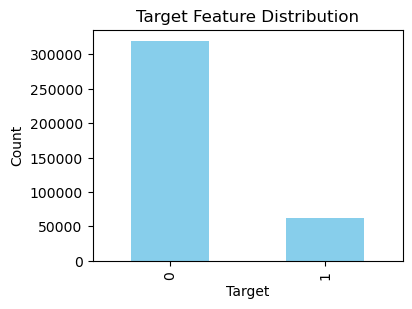

In [7]:
gender_counts = df_train['Target'].value_counts()
plt.figure(figsize=(4, 3))
gender_counts.plot(kind='bar', color='skyblue')
plt.title('Target Feature Distribution')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

In [8]:
df_train['Target'].value_counts()

Target
0    319553
1     62601
Name: count, dtype: int64

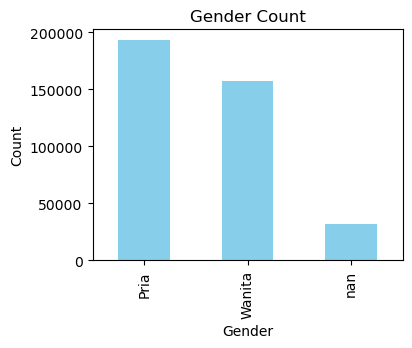

In [9]:
gender_counts = df_train['Gender'].value_counts(dropna=False)

plt.figure(figsize=(4, 3))
gender_counts.plot(kind='bar', color='skyblue')
plt.title('Gender Count')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

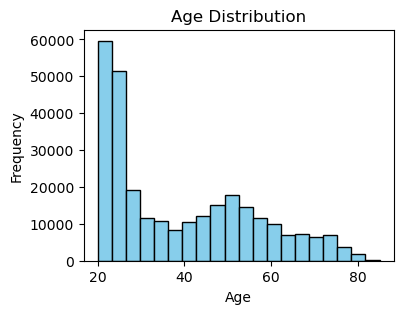

In [10]:
plt.figure(figsize=(4, 3))
plt.hist(df_train['Umur'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

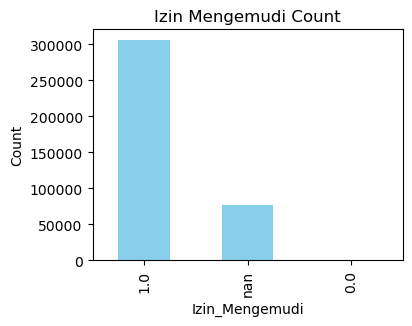

In [11]:
izin_mengemudi_counts = df_train['Izin_Mengemudi'].value_counts(dropna=False)

plt.figure(figsize=(4, 3))
izin_mengemudi_counts.plot(kind='bar', color='skyblue')
plt.title('Izin Mengemudi Count')
plt.xlabel('Izin_Mengemudi')
plt.ylabel('Count')
plt.show()

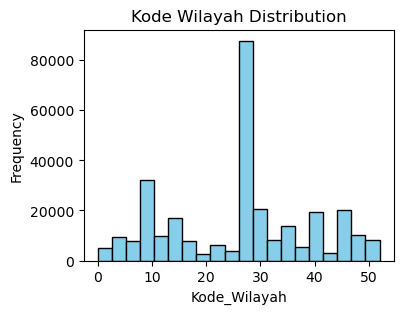

In [12]:
plt.figure(figsize=(4, 3))
plt.hist(df_train['Kode_Wilayah'], bins=20, color='skyblue', edgecolor='black')
plt.title('Kode Wilayah Distribution')
plt.xlabel('Kode_Wilayah')
plt.ylabel('Frequency')
plt.show()

In [13]:
#tanggal asuransi
df_train['Tanggal_Asuransi'] = df_train['Tanggal_Asuransi'].fillna('0/0/0')
df_train['Tanggal'] = df_train['Tanggal_Asuransi'].apply(lambda x:x.split('/')[1])
df_train['Tanggal']=df_train['Tanggal'].apply(int)

In [14]:
#bulan asuransi
df_train['Bulan'] = df_train['Tanggal_Asuransi'].apply(lambda x:x.split('/')[0])
df_train['Bulan']=df_train['Bulan'].apply(int)

In [15]:
#tahun asuransi
df_train['Tahun'] = df_train['Tanggal_Asuransi'].apply(lambda x:x.split('/')[2])
df_train['Tahun']=df_train['Tahun'].apply(int)

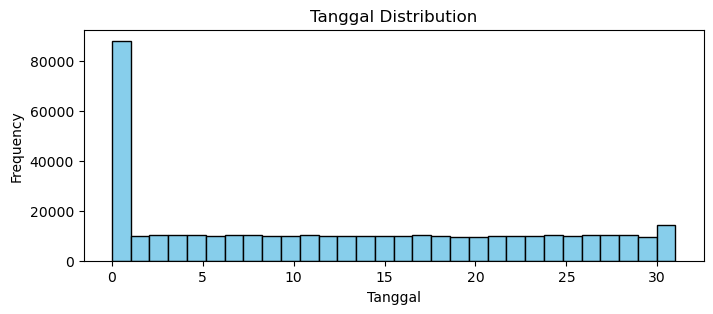

In [16]:
plt.figure(figsize=(8, 3))
plt.hist(df_train['Tanggal'], bins=30, color='skyblue', edgecolor='black')
plt.title('Tanggal Distribution')
plt.xlabel('Tanggal')
plt.ylabel('Frequency')
plt.show()

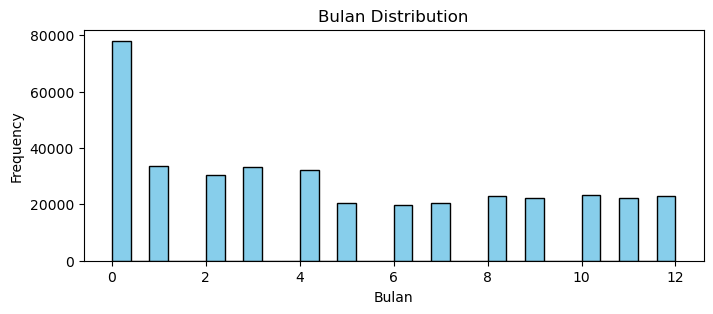

In [17]:
plt.figure(figsize=(8, 3))
plt.hist(df_train['Bulan'], bins=30, color='skyblue', edgecolor='black')
plt.title('Bulan Distribution')
plt.xlabel('Bulan')
plt.ylabel('Frequency')
plt.show()

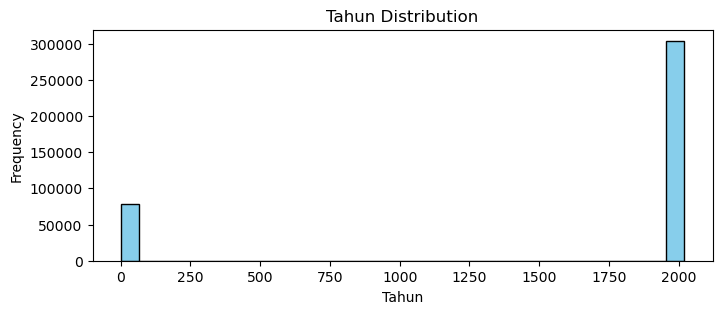

In [18]:
plt.figure(figsize=(8, 3))
plt.hist(df_train['Tahun'], bins=30, color='skyblue', edgecolor='black')
plt.title('Tahun Distribution')
plt.xlabel('Tahun')
plt.ylabel('Frequency')
plt.show()

In [19]:
df_train['Tahun'].value_counts()

Tahun
2019    133545
2018    121097
0        78084
2020     49428
Name: count, dtype: int64

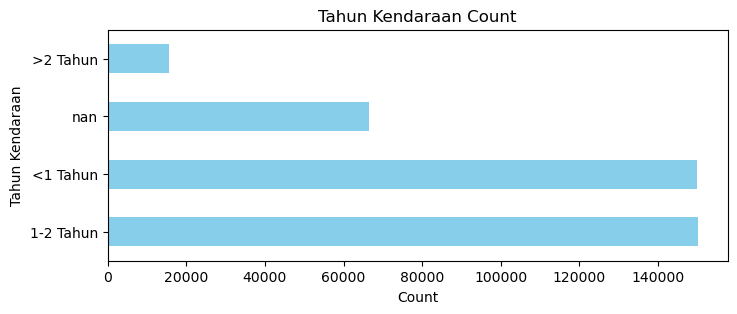

In [20]:
tahun_kendaraan_counts = df_train['Tahun_Kendaraan'].value_counts(dropna=False)

plt.figure(figsize=(8, 3))
tahun_kendaraan_counts.plot(kind='barh', color='skyblue')
plt.title('Tahun Kendaraan Count')
plt.xlabel('Count')
plt.ylabel('Tahun Kendaraan')
plt.show()

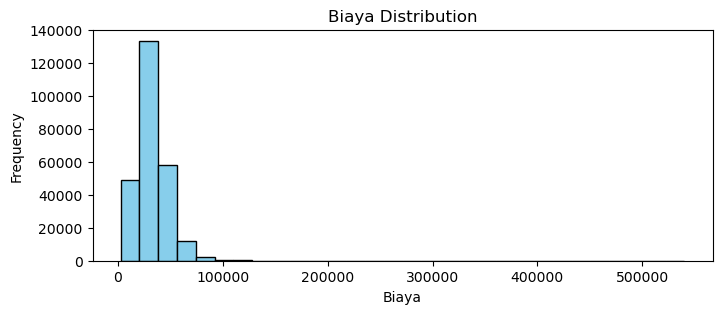

In [21]:
plt.figure(figsize=(8, 3))
plt.hist(df_train['Biaya'], bins=30, color='skyblue', edgecolor='black')
plt.title('Biaya Distribution')
plt.xlabel('Biaya')
plt.ylabel('Frequency')
plt.show()

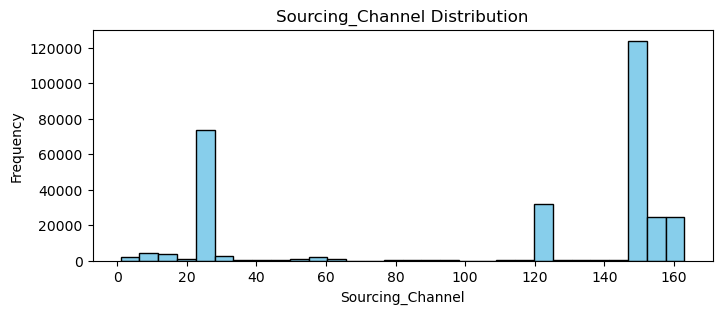

In [22]:
plt.figure(figsize=(8, 3))
plt.hist(df_train['Sourcing_Channel'], bins=30, color='skyblue', edgecolor='black')
plt.title('Sourcing_Channel Distribution')
plt.xlabel('Sourcing_Channel')
plt.ylabel('Frequency')
plt.show()

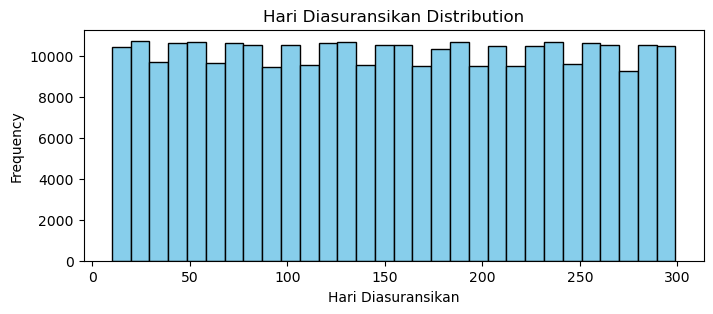

In [23]:
plt.figure(figsize=(8, 3))
plt.hist(df_train['Hari_Diasuransikan'], bins=30, color='skyblue', edgecolor='black')
plt.title('Hari Diasuransikan Distribution')
plt.xlabel('Hari Diasuransikan')
plt.ylabel('Frequency')
plt.show()

In [24]:
#missing value GENDER diisi kelas mayoritas
#missing value UMUR diisi median
#Missing value IZIN MENGEMUDI diisi kelas mayoritas
#missing value KODE WILAYAH diisi kelas mayoritas
#missing value TANGGAL ASURANSI diisi kelas mayoritas
#missing value TAHUN KENDARAAN diisi kelas mayoritas
#missing value BIAYA diisi median
#missing value SOURCING CHANNEL diisi kelas mayoritas
#missing value HARI DIASURANSIKAN diisi

In [25]:
df_train['Gender'] = df_train['Gender'].fillna('Pria')
df_train['Umur'] = df_train['Umur'].fillna(df_train['Umur'].median())
df_train['Izin_Mengemudi'] = df_train['Izin_Mengemudi'].fillna(1.0)
df_train['Kode_Wilayah'] = df_train['Kode_Wilayah'].fillna(28.0)

df_train['Tahun_Kendaraan'] = df_train['Tahun_Kendaraan'].fillna('1-2 Tahun')
df_train['Biaya'] = df_train['Biaya'].fillna(df_train['Biaya'].median())
df_train['Sourcing_Channel'] = df_train['Sourcing_Channel'].fillna(152.0)
df_train['Hari_Diasuransikan'] = df_train['Hari_Diasuransikan'].fillna(df_train['Hari_Diasuransikan'].mean())

df_train["Tanggal"].fillna(method='bfill', inplace=True)
df_train["Bulan"].fillna(method='bfill', inplace=True)
df_train["Tahun"].fillna(method='bfill', inplace=True)

In [26]:
df_train.isnull().sum()

id                    0
Gender                0
Umur                  0
Izin_Mengemudi        0
Kode_Wilayah          0
Tanggal_Asuransi      0
Tahun_Kendaraan       0
Biaya                 0
Sourcing_Channel      0
Hari_Diasuransikan    0
Target                0
Tanggal               0
Bulan                 0
Tahun                 0
dtype: int64

In [27]:
df_train.head()

,id,Gender,Umur,Izin_Mengemudi,Kode_Wilayah,Tanggal_Asuransi,Tahun_Kendaraan,Biaya,Sourcing_Channel,Hari_Diasuransikan,Target,Tanggal,Bulan,Tahun
0,58609,Pria,65.0,1.0,48.0,11/4/2018,1-2 Tahun,2630.0,15.0,131.000000,0,4,11,2018
1,208222,Wanita,22.0,1.0,21.0,2/2/2018,<1 Tahun,31887.0,152.0,154.168995,0,2,2,2018
2,345428,Wanita,24.0,1.0,28.0,5/12/2019,<1 Tahun,31887.0,152.0,181.000000,0,12,5,2019
3,236831,Pria,58.0,1.0,46.0,0/0/0,1-2 Tahun,31887.0,124.0,154.168995,0,0,0,0
4,280181,Pria,33.0,1.0,36.0,11/19/2019,>2 Tahun,31887.0,152.0,154.168995,1,19,11,2019


In [28]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder(categories=[['Pria','Wanita']])
df_train['Gender'] = ordinal_encoder.fit_transform(df_train[['Gender']])
df_train['Gender'] = df_train['Gender'].astype(int)
df_train.head()

,id,Gender,Umur,Izin_Mengemudi,Kode_Wilayah,Tanggal_Asuransi,Tahun_Kendaraan,Biaya,Sourcing_Channel,Hari_Diasuransikan,Target,Tanggal,Bulan,Tahun
0,58609,0,65.0,1.0,48.0,11/4/2018,1-2 Tahun,2630.0,15.0,131.000000,0,4,11,2018
1,208222,1,22.0,1.0,21.0,2/2/2018,<1 Tahun,31887.0,152.0,154.168995,0,2,2,2018
2,345428,1,24.0,1.0,28.0,5/12/2019,<1 Tahun,31887.0,152.0,181.000000,0,12,5,2019
3,236831,0,58.0,1.0,46.0,0/0/0,1-2 Tahun,31887.0,124.0,154.168995,0,0,0,0
4,280181,0,33.0,1.0,36.0,11/19/2019,>2 Tahun,31887.0,152.0,154.168995,1,19,11,2019


In [29]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder(categories=[['<1 Tahun', '1-2 Tahun', '>2 Tahun']])
df_train['Tahun_Kendaraan'] = ordinal_encoder.fit_transform(df_train[['Tahun_Kendaraan']])
df_train['Tahun_Kendaraan'] = df_train['Tahun_Kendaraan'].astype(int)
df_train.head()

,id,Gender,Umur,Izin_Mengemudi,Kode_Wilayah,Tanggal_Asuransi,Tahun_Kendaraan,Biaya,Sourcing_Channel,Hari_Diasuransikan,Target,Tanggal,Bulan,Tahun
0,58609,0,65.0,1.0,48.0,11/4/2018,1,2630.0,15.0,131.000000,0,4,11,2018
1,208222,1,22.0,1.0,21.0,2/2/2018,0,31887.0,152.0,154.168995,0,2,2,2018
2,345428,1,24.0,1.0,28.0,5/12/2019,0,31887.0,152.0,181.000000,0,12,5,2019
3,236831,0,58.0,1.0,46.0,0/0/0,1,31887.0,124.0,154.168995,0,0,0,0
4,280181,0,33.0,1.0,36.0,11/19/2019,2,31887.0,152.0,154.168995,1,19,11,2019


In [30]:
from sklearn.preprocessing import StandardScaler

columns_to_scale = [
    'Biaya', 'Hari_Diasuransikan'
]
data_to_scale = df_train[columns_to_scale]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_to_scale)

# Update the original dataset with the scaled values
df_train[columns_to_scale] = scaled_data
df_train.head()

,id,Gender,Umur,Izin_Mengemudi,Kode_Wilayah,Tanggal_Asuransi,Tahun_Kendaraan,Biaya,Sourcing_Channel,Hari_Diasuransikan,Target,Tanggal,Bulan,Tahun
0,58609,0,65.0,1.0,48.0,11/4/2018,1,-1.913262,15.0,-3.090201e-01,0,4,11,2018
1,208222,1,22.0,1.0,21.0,2/2/2018,0,0.031264,152.0,-7.581580e-16,0,2,2,2018
2,345428,1,24.0,1.0,28.0,5/12/2019,0,0.031264,152.0,3.578627e-01,0,12,5,2019
3,236831,0,58.0,1.0,46.0,0/0/0,1,0.031264,124.0,-7.581580e-16,0,0,0,0
4,280181,0,33.0,1.0,36.0,11/19/2019,2,0.031264,152.0,-7.581580e-16,1,19,11,2019


## Testing Set 

In [31]:
df_test=pd.read_csv('joints_test.csv')

In [32]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78273 entries, 0 to 78272
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  78273 non-null  int64  
 1   Gender              70695 non-null  object 
 2   Umur                62692 non-null  float64
 3   Izin_Mengemudi      62560 non-null  float64
 4   Kode_Wilayah        58720 non-null  float64
 5   Tanggal_Asuransi    67021 non-null  object 
 6   Tahun_Kendaraan     64722 non-null  object 
 7   Biaya               57426 non-null  float64
 8   Sourcing_Channel    65034 non-null  float64
 9   Hari_Diasuransikan  61053 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 6.0+ MB


In [33]:
df_test['Tanggal_Asuransi'] = df_test['Tanggal_Asuransi'].fillna('0/0/0')
#tanggal asuransi
df_test['Tanggal'] = df_test['Tanggal_Asuransi'].apply(lambda x:x.split('/')[1])
df_test['Tanggal']=df_test['Tanggal'].apply(int)

#bulan asuransi
df_test['Bulan'] = df_test['Tanggal_Asuransi'].apply(lambda x:x.split('/')[0])
df_test['Bulan']=df_test['Bulan'].apply(int)

#tahun asuransi
df_test['Tahun'] = df_test['Tanggal_Asuransi'].apply(lambda x:x.split('/')[2])
df_test['Tahun']=df_test['Tahun'].apply(int)

In [34]:
df_test['Gender'] = df_test['Gender'].fillna('Pria')
df_test['Umur'] = df_test['Umur'].fillna(df_test['Umur'].median())
df_test['Izin_Mengemudi'] = df_test['Izin_Mengemudi'].fillna(1.0)
df_test['Kode_Wilayah'] = df_test['Kode_Wilayah'].fillna(28.0)

df_test['Tahun_Kendaraan'] = df_test['Tahun_Kendaraan'].fillna('1-2 Tahun')
df_test['Biaya'] = df_test['Biaya'].fillna(df_test['Biaya'].median())
df_test['Sourcing_Channel'] = df_test['Sourcing_Channel'].fillna(152.0)
df_test['Hari_Diasuransikan'] = df_test['Hari_Diasuransikan'].fillna(df_train['Hari_Diasuransikan'].mean())

df_train["Tanggal"].fillna(method='bfill', inplace=True)
df_train["Bulan"].fillna(method='bfill', inplace=True)
df_train["Tahun"].fillna(method='bfill', inplace=True)

In [35]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder(categories=[['Pria','Wanita']])
df_test['Gender'] = ordinal_encoder.fit_transform(df_test[['Gender']])
df_test['Gender'] = df_test['Gender'].astype(int)
df_test.head()

,id,Gender,Umur,Izin_Mengemudi,Kode_Wilayah,Tanggal_Asuransi,Tahun_Kendaraan,Biaya,Sourcing_Channel,Hari_Diasuransikan,Tanggal,Bulan,Tahun
0,273737,0,40.0,1.0,11.0,0/0/0,1-2 Tahun,32412.5,152.0,193.0,0,0,0
1,49175,0,25.0,1.0,30.0,4/14/2018,<1 Tahun,32412.5,152.0,153.0,14,4,2018
2,353494,1,50.0,1.0,19.0,12/25/2019,1-2 Tahun,31641.0,124.0,278.0,25,12,2019
3,182676,1,59.0,1.0,28.0,5/4/2018,1-2 Tahun,2630.0,26.0,202.0,4,5,2018
4,498206,1,57.0,1.0,28.0,4/17/2019,1-2 Tahun,26357.0,122.0,142.0,17,4,2019


In [36]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder(categories=[['<1 Tahun', '1-2 Tahun', '>2 Tahun']])
df_test['Tahun_Kendaraan'] = ordinal_encoder.fit_transform(df_test[['Tahun_Kendaraan']])
df_test['Tahun_Kendaraan'] = df_test['Tahun_Kendaraan'].astype(int)
df_test.head()

,id,Gender,Umur,Izin_Mengemudi,Kode_Wilayah,Tanggal_Asuransi,Tahun_Kendaraan,Biaya,Sourcing_Channel,Hari_Diasuransikan,Tanggal,Bulan,Tahun
0,273737,0,40.0,1.0,11.0,0/0/0,1,32412.5,152.0,193.0,0,0,0
1,49175,0,25.0,1.0,30.0,4/14/2018,0,32412.5,152.0,153.0,14,4,2018
2,353494,1,50.0,1.0,19.0,12/25/2019,1,31641.0,124.0,278.0,25,12,2019
3,182676,1,59.0,1.0,28.0,5/4/2018,1,2630.0,26.0,202.0,4,5,2018
4,498206,1,57.0,1.0,28.0,4/17/2019,1,26357.0,122.0,142.0,17,4,2019


In [37]:
from sklearn.preprocessing import StandardScaler

columns_to_scale = [
    'Biaya', 'Hari_Diasuransikan'
]
data_to_scale = df_test[columns_to_scale]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_to_scale)

# Update the original dataset with the scaled values
df_test[columns_to_scale] = scaled_data
df_test.head()

,id,Gender,Umur,Izin_Mengemudi,Kode_Wilayah,Tanggal_Asuransi,Tahun_Kendaraan,Biaya,Sourcing_Channel,Hari_Diasuransikan,Tanggal,Bulan,Tahun
0,273737,0,40.0,1.0,11.0,0/0/0,1,0.024657,152.0,0.739286,0,0,0
1,49175,0,25.0,1.0,30.0,4/14/2018,0,0.024657,152.0,0.329915,14,4,2018
2,353494,1,50.0,1.0,19.0,12/25/2019,1,-0.024868,124.0,1.609199,25,12,2019
3,182676,1,59.0,1.0,28.0,5/4/2018,1,-1.887185,26.0,0.831395,4,5,2018
4,498206,1,57.0,1.0,28.0,4/17/2019,1,-0.364067,122.0,0.217338,17,4,2019


## Model Training

In [38]:
#variable independen
X = df_train.drop(['Target','Tanggal_Asuransi', 'Sourcing_Channel', 'Izin_Mengemudi'], axis=1)
#variable dependen
y = df_train['Target']

In [39]:
df_train.sort_values(by=["id"], inplace=True)

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(305723, 10)
(76431, 10)
(305723,)
(76431,)


### KNN 

In [41]:
from sklearn.neighbors import KNeighborsClassifier

model_KNN = KNeighborsClassifier(n_neighbors = 3)
model_KNN.fit(X_train, y_train)
y_pred_KNN = model_KNN.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred_KNN))

0.8264055160864048


### Naive Bayes 

In [43]:
from sklearn.naive_bayes import GaussianNB
model_GNB = GaussianNB()
model_GNB.fit(X_train, y_train)
y_pred_GNB = model_GNB.predict(X_test)

In [44]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred_GNB))

0.8171422590310214


### Decision Tree 

In [45]:
from sklearn.tree import DecisionTreeClassifier
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train, y_train)
y_pred_DT = model_DT.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred_DT))

0.8452329552145073


### Logistic Regression 

In [47]:
from sklearn.linear_model import LogisticRegression
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)
y_pred_LR = model_LR.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred_LR))

0.8436367442529864


### XGBoost 

In [49]:
from xgboost import XGBClassifier
model_XGB = XGBClassifier()
model_XGB.fit(X_train,y_train)
y_pred_XGB = model_XGB.predict(X_test)

In [50]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred_XGB))

0.8975677408381416


In [51]:
acc_KNN = accuracy_score(y_test,y_pred_KNN)
acc_GNB = accuracy_score(y_test,y_pred_GNB)
acc_DT = accuracy_score(y_test,y_pred_DT)
acc_LR = accuracy_score(y_test,y_pred_LR)
acc_XGB = accuracy_score(y_test,y_pred_XGB)

models = pd.DataFrame(
    {
        'Model': ['KNN', 'Naive Bayes', 'Decision Tree', 'Linear Regression', 'XGBoost'],
        'Score': [acc_KNN, acc_GNB, acc_DT, acc_LR, acc_XGB]
    }
)
models.sort_values(by='Score', ascending=False)

,Model,Score
4,XGBoost,0.897568
2,Decision Tree,0.845233
3,Linear Regression,0.843637
0,KNN,0.826406
1,Naive Bayes,0.817142


## Fine Tuning The Best Model 

In [52]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
model_xgb=XGBClassifier()

parameter =  {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
}

random_search = RandomizedSearchCV(model_xgb, parameter, cv=5, scoring='accuracy')
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 5, 7],
                                        'min_child_weight': [1, 3, 5],
                                        'n_estimators': [100, 200, 300]},
                   scoring='accuracy')

In [53]:
random_search.best_score_

0.8983295330666266

In [54]:
model_xgb_tuned = random_search.best_estimator_

## Model Testing

In [55]:
df_test.drop(['Tanggal_Asuransi', 'Sourcing_Channel', 'Izin_Mengemudi'], axis=1, inplace=True)
print(df_test.shape)

(78273, 10)


In [56]:
y_test_pred = model_xgb_tuned.predict(df_test)

In [57]:
hasil = pd.DataFrame({'id' : df_test['id'], 'Target' : y_test_pred})
hasil

,id,Target
0,273737,0
1,49175,0
2,353494,0
3,182676,0
4,498206,0
...,...,...
78268,456819,0
78269,202443,0
78270,368881,0
78271,145064,0


In [58]:
hasil.to_csv('joints_submission.csv',index=False)

### Public score:  0.90145